In [12]:
from twarc import Twarc
import pandas as pd
import json
import emoji
import seaborn as sns

In [13]:
# Initialize twarc with your Twitter API credentials
t = Twarc(consumer_key='QAlOsFqFtWiRVFRndgC31HGBo',
          consumer_secret='uitKDVrYBbSZZhbJg15xonJShOl0NFLg7iayVKc0aJhCQLtwxl', 
          access_token='1570111679039520773-L2DOWoUADykCMOGNBg1KSYCqsjAYPS', 
          access_token_secret='lJAN4bF31flrPVcY4rlzWf8wTBpw9msrdyXZw85i39HKt')

activity = []

for line in open('useractivity.jsonl', 'r'):
    activity.append(json.loads(line))

# Create a dataframe
activity = pd.DataFrame(activity)
activity

,data,includes,meta,__twarc,errors
0,"[{'entities': {'annotations': [{'start': 34, '...","{'media': [{'height': 682, 'width': 1024, 'url...","{'result_count': 3, 'newest_id': '130602635889...",{'url': 'https://api.twitter.com/2/users/12360...,NaN
1,"[{'public_metrics': {'retweet_count': 0, 'repl...",{'users': [{'description': 'Shorenstein Center...,"{'result_count': 100, 'newest_id': '1311712479...",{'url': 'https://api.twitter.com/2/users/56772...,"[{'resource_id': 'kathytpham', 'parameter': 'e..."
2,"[{'text': '""The only relief from the anxiety i...",{'users': [{'created_at': '2009-07-14T18:27:34...,{'next_token': '7140dibdnow9c7btw3t4674ymu441t...,{'url': 'https://api.twitter.com/2/users/56772...,"[{'value': 'Goodman_Writer', 'detail': 'Could ..."
3,[{'text': 'HKS professors @KhalilGMuhammad &am...,{'users': [{'created_at': '2009-07-14T18:27:34...,{'next_token': '7140dibdnow9c7btw3t3qzgoxchrfo...,{'url': 'https://api.twitter.com/2/users/56772...,"[{'value': 'aprilaser', 'detail': 'Could not f..."
4,[{'text': 'The #CovidStates survey is a collab...,{'users': [{'created_at': '2009-07-14T18:27:34...,{'next_token': '7140dibdnow9c7btw3t3bpjht0gwmz...,{'url': 'https://api.twitter.com/2/users/56772...,"[{'value': 'aprilaser', 'detail': 'Could not f..."
...,...,...,...,...,...
2372,"[{'id': '1309668735708528641', 'referenced_twe...","{'users': [{'id': '3497229613', 'created_at': ...","{'result_count': 21, 'newest_id': '13096687357...",{'url': 'https://api.twitter.com/2/users/34972...,NaN
2373,"[{'entities': {'urls': [{'start': 64, 'end': 8...",{'media': [{'url': 'https://pbs.twimg.com/medi...,"{'result_count': 100, 'newest_id': '1310353551...",{'url': 'https://api.twitter.com/2/users/57014...,"[{'value': '1268265706220433408', 'detail': 'C..."
2374,"[{'reply_settings': 'everyone', 'lang': 'en', ...","{'users': [{'name': 'Christina Thornton', 'use...","{'result_count': 99, 'newest_id': '12622463566...",{'url': 'https://api.twitter.com/2/users/57014...,"[{'value': '1173990600565121024', 'detail': 'C..."
2375,"[{'reply_settings': 'everyone', 'lang': 'en', ...",{'users': [{'description': 'Assistant Prof @ca...,{'previous_token': '77qpymm88g5h9vqkluicoaveqc...,{'url': 'https://api.twitter.com/2/users/57014...,NaN


In [14]:
input = []
for dictionary in activity['data'].tolist():
    input.append(pd.DataFrame(dictionary))
df_tweets_raw = pd.concat(input).reset_index(drop=True)
# keep tweets in english
df_tweets = df_tweets_raw[df_tweets_raw['lang'] == 'en']
df_tweets

,entities,edit_history_tweet_ids,id,attachments,text,context_annotations,referenced_tweets,created_at,reply_settings,public_metrics,in_reply_to_user_id,author_id,possibly_sensitive,edit_controls,conversation_id,lang,geo,withheld
0,"{'annotations': [{'start': 34, 'end': 45, 'pro...",[1306026358896758784],1306026358896758784,{'media_keys': ['3_1306026354333319168']},@nolan_madeleine @ddsv3 @thenosm #NOSMRollCall...,"[{'domain': {'id': '65', 'name': 'Interests an...","[{'type': 'replied_to', 'id': '130596403659352...",2020-09-16T00:25:23.000Z,everyone,"{'retweet_count': 2, 'reply_count': 0, 'like_c...",165638031,1236031388933074951,False,"{'edits_remaining': 5, 'is_edit_eligible': Tru...",1305964036593528832,en,NaN,NaN
1,"{'mentions': [{'start': 3, 'end': 9, 'username...",[1305656494256517121],1305656494256517121,NaN,RT @ddsv3: TWEETUP @thenosm @_justinam @nolan_...,NaN,"[{'type': 'retweeted', 'id': '1305655825449586...",2020-09-14T23:55:40.000Z,everyone,"{'retweet_count': 4, 'reply_count': 0, 'like_c...",NaN,1236031388933074951,False,"{'edits_remaining': 5, 'is_edit_eligible': Tru...",1305656494256517121,en,NaN,NaN
2,"{'annotations': [{'start': 10, 'end': 13, 'pro...",[1288624317379555328],1288624317379555328,NaN,Inspiring TEDx Talk given by my mentor @moradh...,NaN,NaN,2020-07-29T23:55:53.000Z,everyone,"{'retweet_count': 1, 'reply_count': 0, 'like_c...",NaN,1236031388933074951,False,"{'edits_remaining': 5, 'is_edit_eligible': Tru...",1288624317379555328,en,NaN,NaN
3,"{'urls': [{'start': 35, 'end': 58, 'url': 'htt...",[1311712479366574083],1311712479366574083,NaN,You don't want to miss this event! https://t.c...,"[{'domain': {'id': '45', 'name': 'Brand Vertic...","[{'type': 'quoted', 'id': '1311710218829561856'}]",2020-10-01T17:00:00.000Z,everyone,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",NaN,56772461,False,"{'edits_remaining': 5, 'is_edit_eligible': Tru...",1311712479366574083,en,NaN,NaN
4,"{'mentions': [{'start': 1, 'end': 12, 'usernam...",[1311380294671503360],1311380294671503360,NaN,.@BostonJoan discusses a coordinated push of c...,"[{'domain': {'id': '45', 'name': 'Brand Vertic...",NaN,2020-09-30T19:00:01.000Z,everyone,"{'retweet_count': 6, 'reply_count': 0, 'like_c...",NaN,56772461,False,"{'edits_remaining': 5, 'is_edit_eligible': Tru...",1311380294671503360,en,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192272,"{'mentions': [{'start': 3, 'end': 13, 'usernam...",[1214995668500135937],1214995668500135937,NaN,RT @McMasterU: McMaster is deeply saddened by ...,NaN,"[{'type': 'retweeted', 'id': '1214989671425609...",2020-01-08T19:41:55.000Z,everyone,"{'retweet_count': 141, 'reply_count': 0, 'like...",NaN,818154242477277186,False,"{'edits_remaining': 5, 'is_edit_eligible': Tru...",1214995668500135937,en,NaN,NaN
192273,"{'mentions': [{'start': 0, 'end': 13, 'usernam...",[1198209259630141440],1198209259630141440,NaN,@EdsonBellido Thank you Edson!,NaN,"[{'type': 'replied_to', 'id': '119809670781014...",2019-11-23T11:58:43.000Z,everyone,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",279368185,818154242477277186,False,"{'edits_remaining': 5, 'is_edit_eligible': Tru...",1197943524332752901,en,NaN,NaN
192274,"{'annotations': [{'start': 29, 'end': 31, 'pro...",[1198079967260631041],1198079967260631041,NaN,@xufei0304 Thank you so much Fei! :),NaN,"[{'type': 'replied_to', 'id': '119803474802059...",2019-11-23T03:24:58.000Z,everyone,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",1042092036,818154242477277186,False,"{'edits_remaining': 5, 'is_edit_eligible': Tru...",1198034748020592641,en,NaN,NaN
192275,"{'annotations': [{'start': 33, 'end': 40, 'pro...",[1197943524332752901],1197943524332752901,NaN,It was truly an honor! Thank you McMaster! htt...,NaN,"[{'type': 'quoted', 'id': '1197920713333780482'}]",2019-11-22T18:22:47.000Z,everyone,"{'retweet_count': 1, 'reply_count': 1, 'like_c...",NaN,818154242477277186,False,"{'edits_remaining': 5, 'is_edit_eligible': Tru...",11979435243327

In [15]:
top_hashtags = pd.Series(df_tweets['text'].str.extractall('(#(\w+))')[0].tolist())
top_hashtags.value_counts().head(10)

#COVID19        6696
#MedEd           725
#cannabis        646
#coronavirus     645
#covid19         560
#COVID           531
#MedTwitter      497
#mmj             485
#ottnews         453
#health          436
dtype: int64

In [16]:
top_mentions = pd.Series(df_tweets['text'].str.extractall('(@[\w]+)')[0].tolist())
top_mentions.value_counts().head(10)

@picardonhealth    970
@JustinTrudeau     750
@ctvottawa         659
@UHN               639
@fordnation        623
@uoftmedicine      597
@mch_childrens     557
@DFisman           555
@CMA_Docs          507
@CPHO_Canada       507
dtype: int64

In [17]:
#def get_emojis(s):
#    return ''.join(c for c in s if c in emoji.UNICODE_EMOJI['en'])

df_tweets['emojis'] = df_tweets['text'].apply(lambda x: emoji.emoji_list(x))
df_emoji = []
for e in df_tweets['emojis'].tolist():
    if len(e)>0:
        for i in e:
            df_emoji.append(i['emoji'])

pd.Series(df_emoji).value_counts()[:10]

/tmp/ipykernel_3951/1823372533.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweets['emojis'] = df_tweets['text'].apply(lambda x: emoji.emoji_list(x))


❤️    1929
😂     1892
🇨🇦    1189
👏      910
🙏      705
👇      576
🎉      564
😊      555
🤣      470
😍      469
dtype: int64

In [18]:
# variable of time and frequency of retweets
df_tweets['date'] = (pd.to_datetime(df_tweets['created_at'])).dt.date
df_tweets.loc[:, 'retweet_count'] = df_tweets['public_metrics'].apply(lambda x: x['retweet_count'])
df_retweet = df_tweets.groupby('date')['retweet_count'].sum().reset_index()

/tmp/ipykernel_3951/2077775251.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweets['date'] = (pd.to_datetime(df_tweets['created_at'])).dt.date
/tmp/ipykernel_3951/2077775251.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweets.loc[:, 'retweet_count'] = df_tweets['public_metrics'].apply(lambda x: x['retweet_count'])


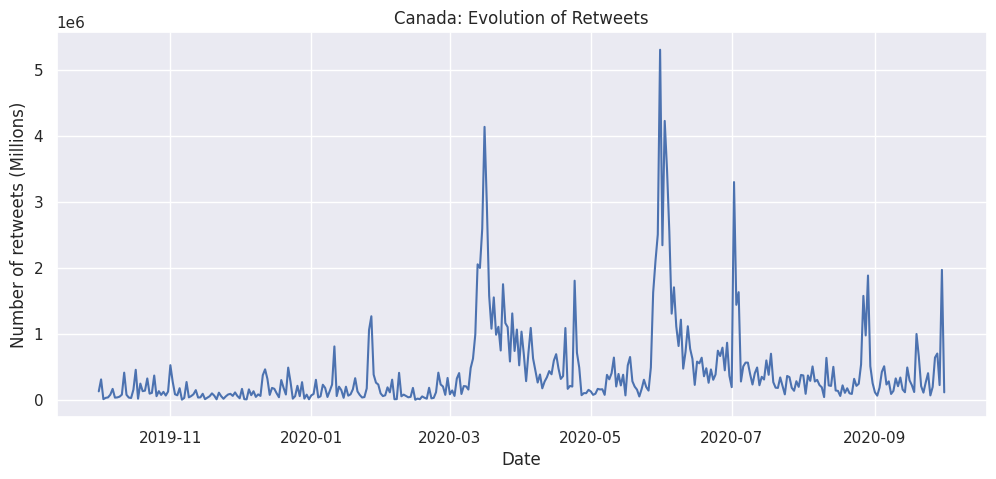

In [19]:
# Plot the evolution of the total number of retweets
sns.set_style("darkgrid")
g = sns.lineplot(x="date", y="retweet_count", data=df_retweet)
g.set(title = "Canada: Evolution of Retweets", xlabel = "Date", ylabel = "Number of retweets (Millions)")
sns.set(rc={'figure.figsize':(12,5)})

In [20]:
keywords_covid = ['pandemic','covid','asymptomatic','coronavirus','incubation','pathogen',
                'distancing','quarantine','isolation','antibody','outbreak','epidemic',
                'mask','immunity','respirator']
df_covid = df_tweets[df_tweets['text'].str.contains('|'.join(keywords_covid), case=False)]
df_covid_count = df_covid.groupby('date')['author_id'].count().reset_index()

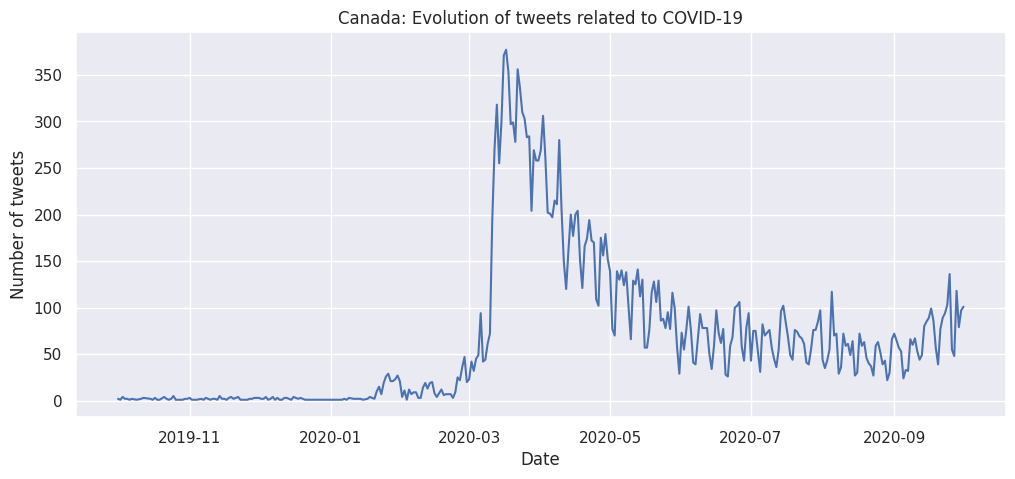

In [21]:
# Plot the evolution of the total number of retweets
sns.set_style("darkgrid")
g = sns.lineplot(x="date", y="author_id", data=df_covid_count)
g.set(title = "Canada: Evolution of tweets related to COVID-19", xlabel = "Date", ylabel = "Number of tweets")
sns.set(rc={'figure.figsize':(12,5)})